<a href="https://colab.research.google.com/github/irenenjoki/datascience/blob/main/elections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

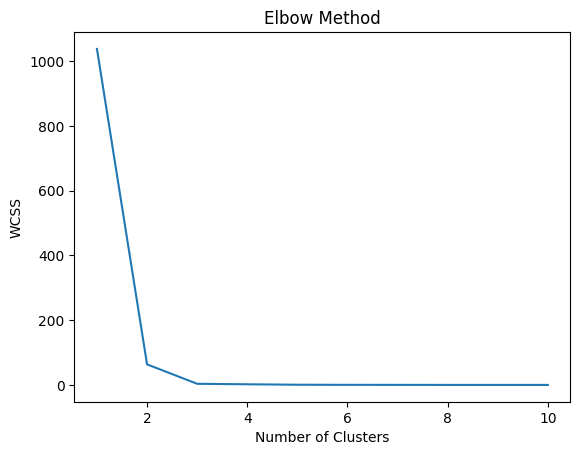

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


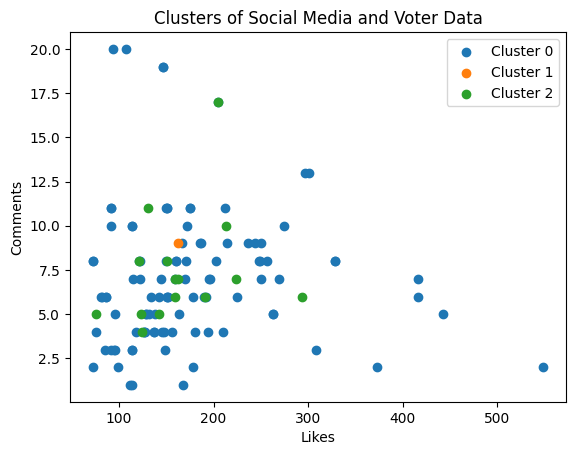

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the datasets
social_media_data = pd.read_csv('/content/Instagram data.csv')
voter_registration_data = pd.read_csv('/content/2020 November General Election - Turnout Rates.csv')

# Remove commas from the numeric columns in voter registration data
voter_registration_data.replace({',': ''}, regex=True, inplace=True)

# Select relevant features for clustering from social media data
social_media_features = social_media_data[['From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']]

# Select relevant features for clustering from voter registration data
voter_features = voter_registration_data[['Total Ballots Counted (Estimate)', 'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)', 'Total Ineligible Felon']]

# Merge the datasets based on common identifiers
merged_data = pd.concat([social_media_features, voter_features], axis=1)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
merged_data_imputed = imputer.fit_transform(merged_data)

# Normalize the merged data
X_normalized = (merged_data_imputed - merged_data_imputed.mean()) / merged_data_imputed.std()

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_normalized)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow Method, select the optimal number of clusters
n_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(X_normalized)

# Visualize the clusters
for cluster in range(n_clusters):
    cluster_data = merged_data[merged_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Likes'], cluster_data['Comments'], label=f'Cluster {cluster}')

plt.title('Clusters of Social Media and Voter Data')
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.legend()
plt.show()
